## The SIR epidemic model  
A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease  
I(t) is the number of infectious individuals  
R(t) are those individuals who have recovered from the disease and now have immunity to it.  

The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.  

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:  

$$ {dS \over dt} ={-\beta  SI\over N} $$  
$$ {dI \over dt} = {{\beta  SI\over N}-\gamma I } $$  
$$ {dR \over dt} = {\gamma  I} $$  

#### Exercise:
Build Python code that integrates these equations for a disease characterised by parameters β=0.6 (contact rate), 1/γ=10days (recovery rate) in a population of N=1000 (for example a flu outbreak in a school). The model is started with a single infected individual on day 0: I(0)=1. 

Plot the population dynamics of S, I and R.

Import the required packages

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Assign starting values, parameters ( $\beta$,$\gamma$,S0,I0,R0 and N) and a list of time points to solve the ODEs for.

In [8]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I and R at time=0.
I0=1
R0 = 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Initial conditions vector
y0 = S0, I0, R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta= 0.6
gamma = 0.1

# A list of time points (in days)
t = np.linspace(0, 160, 160)


Define the SIR model

In [9]:
# The SIR model of differential equations.
def model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I /N
    dIdt = beta * S * I /N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


 Integrate the SIR equations over the time grid, t.

In [10]:
ret = odeint(model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Plot the data of S(t), I(t) and R(t) in a single plot.

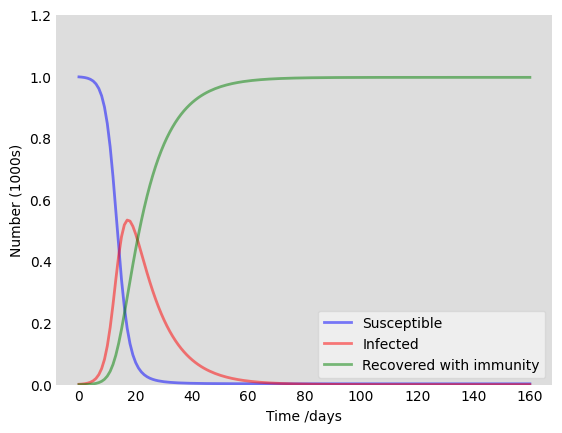

In [11]:

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

To minimize the effect of the outbreak, the school wants to take some measures to reduce the number of infections at a given time. What could the school do to flatten the curve (within the context of this model)? What should they do to minimize the maximum number of infections at the peak to only 200 students? Plot your results.

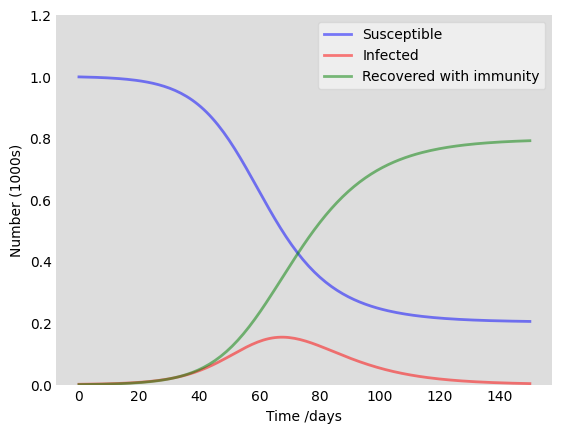

In [12]:
#To flatten the curve, the school can reduce the number of contacts between student (e.g. spreading students, lunch at different times,...).  
#Such restrictions will result in areduced contact rate, beta, which flattens the curve of the infected population.
beta= 0.2
gamma = 0.1

t = np.linspace(0, 150, 160)

ret = odeint(model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()